In [1]:
from track_estimators.ship_track import ShipTrack
from track_estimators.utils import smooth
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read the subsampled data
ship_track = ShipTrack()
ship_track.read_csv(
    csv_file="../data/modern_ships/WCE5063_subset_downsampled.csv",
    ship_id="WCE5063",
    id_col="id",
    lat_col="lat",
    lon_col="lon",
    reverse=False,
)

(array([41.4, 40.8, 40.2, 39.6, 38.9, 38.2, 37.6, 36.9, 36.2, 35.6, 35. ,
        34.4, 34.2, 33.9, 33.5, 33.1, 32.7, 32.3, 31.8, 31.3, 30.7, 30. ,
        29.3, 28.6, 28. , 27.6, 27.2, 26.9, 26.5, 26.2, 26.1, 26.1, 26.1,
        26.1, 26.1, 26.1, 26.1, 26.1, 26.1, 26.1, 26.1, 26.1, 26.1, 26.1,
        26.1, 26.1, 26.1, 26.1, 26.1, 26.2, 26.2, 26.1, 25.8]),
 array([288.6, 288.3, 287.9, 287.5, 287.1, 286.7, 286.3, 285.9, 285.5,
        285.1, 284.8, 284.6, 284.2, 283.5, 282.8, 282. , 281.4, 280.7,
        280.2, 279.8, 279.6, 279.6, 279.6, 279.7, 279.8, 279.9, 280. ,
        280. , 280. , 280. , 279.9, 279.9, 279.9, 279.9, 279.9, 279.9,
        279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9,
        279.9, 279.9, 279.9, 280.1, 280.9, 281.6, 282. , 282.7]),
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,

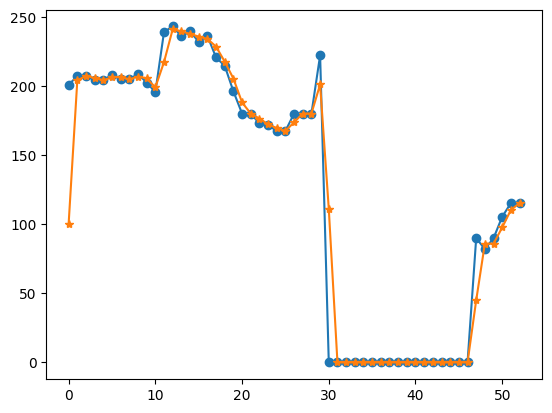

In [9]:
ship_track.calculate_cog_rate()
ship_track.calculate_sog_rate()

plt.plot(range(len(ship_track.cog)), ship_track.cog, "-o")
plt.plot(range(len(ship_track.cog)), smooth(ship_track.cog, 2), "-*")

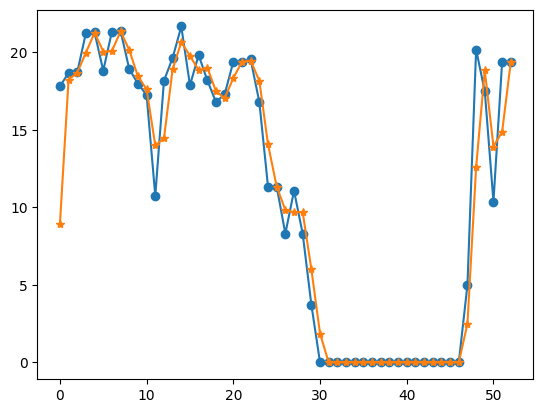

In [10]:
plt.plot(range(len(ship_track.sog)), ship_track.sog, "-o")
plt.plot(range(len(ship_track.sog)), smooth(ship_track.sog, 2), "-*")

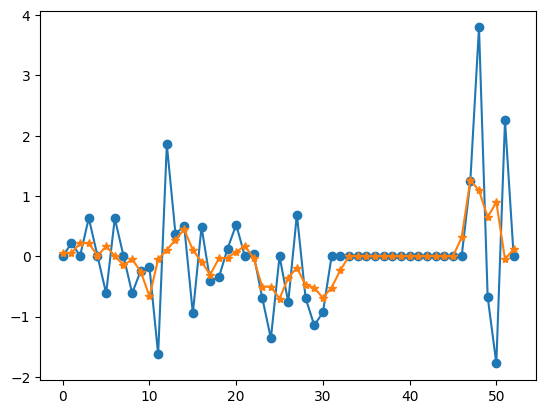

In [11]:
plt.plot(range(len(ship_track.sog_rate)), ship_track.sog_rate, "-o")
plt.plot(range(len(ship_track.sog_rate)), smooth(ship_track.sog_rate, 4), "-*")

In [12]:
from scipy.signal import savgol_filter    

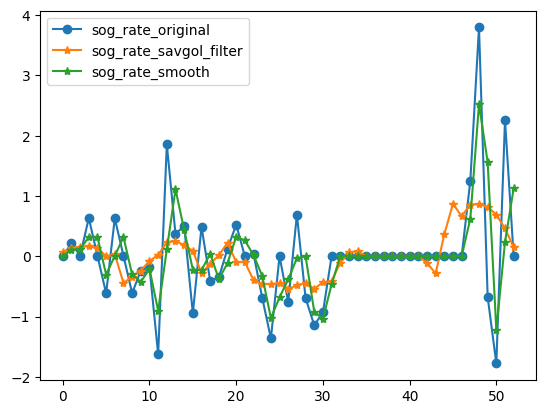

In [13]:
plt.plot(range(len(ship_track.sog_rate)), ship_track.sog_rate, "-o", label="sog_rate_original")
plt.plot(range(len(ship_track.sog_rate)), savgol_filter(ship_track.sog_rate, 10, 2), "-*", label="sog_rate_savgol_filter")
plt.plot(range(len(ship_track.sog_rate)), smooth(ship_track.sog_rate, 2), "-*", label="sog_rate_smooth")
plt.legend()